In [3]:
!python -m pip install -r requirements_mvp7.txt  > /dev/null 2>&1 

In [1]:
import pandas as pd
import numpy as np
import logging
from scipy import stats
from io import StringIO
import logging

In [2]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas//src")
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
# import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
# import data_bbog_integration_fabrica_personas.pipelines.modelo_360.nodes as model_360
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Create a string buffer to capture log output
log_capture_string = StringIO()
ch = logging.StreamHandler(log_capture_string)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

In [5]:
%load_ext kedro.ipython

[03/21/25 16:42:52] INFO     Resolved project path as:                                              ]8;id=839608;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=693139;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/21/25 16:42:52] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=823156;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=745394;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[03/21/25 16:42:53] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=891374;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=745698;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=745015;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=594105;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=807456;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=198556;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=636299;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=201101;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## Lectura 

In [7]:
df= catalog.load('master_ago2023')

                    INFO     Loading data from 'master_ago2023' (ParquetDataSet)...             ]8;id=560371;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=834613;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [8]:
df.head()

,hashvalue1,periodo,birthdate,sex,nivel_educativo,mar_status,estrato,hire_dt,vlr_activos,vlr_ing_bru_mes,...,tc_sum_cupo_disponible_mean_6,tc_sum_cupo_disponible_std_6,tc_sum_facturacion_total_valor_mean_6,tc_sum_facturacion_total_valor_std_6,tc_sum_pagos_total_valor_mean_6,tc_sum_pagos_total_valor_std_6,flujo_neto_ca_mean_6,flujo_neto_ca_std_6,ratio_deuda_ingresos_mean_6,ratio_deuda_ingresos_std_6
0,CC1000000545,202308,1999-04-17,M,2.0,S,0,2023-03-26,5000000.0,3600000.0,...,848598.22,NaN,899000.00,NaN,368030.0,NaN,7600.0,NaN,0.0,NaN
1,CC1000000563,202308,2001-03-12,F,2.0,S,0,2020-12-11,80000000.0,26000000.0,...,2116.28,NaN,7230135.31,NaN,4562539.0,NaN,185846.0,NaN,0.0,NaN
2,CC1000003981,202308,1998-08-31,F,2.0,S,2,2021-06-21,2000000.0,4129773.0,...,5162565.17,NaN,150000.00,NaN,0.0,NaN,5840719.0,NaN,4.0,NaN
3,CC1000018656,202308,2001-11-14,M,2.0,S,0,2022-02-07,1000000.0,956250.0,...,0.00,NaN,0.00,NaN,0.0,NaN,346102.0,NaN,0.0,NaN
4,CC1000020446,202308,2001-12-22,M,2.0,S,0,2023-03-23,5000000.0,1328079.0,...,0.00,NaN,0.00,NaN,0.0,NaN,-14749.0,NaN,1.0,NaN


In [10]:
#df1=df.to_pandas()
df1 = df
df1

,hashvalue1,periodo,birthdate,sex,nivel_educativo,mar_status,estrato,hire_dt,vlr_activos,vlr_ing_bru_mes,...,tc_sum_cupo_disponible_mean_6,tc_sum_cupo_disponible_std_6,tc_sum_facturacion_total_valor_mean_6,tc_sum_facturacion_total_valor_std_6,tc_sum_pagos_total_valor_mean_6,tc_sum_pagos_total_valor_std_6,flujo_neto_ca_mean_6,flujo_neto_ca_std_6,ratio_deuda_ingresos_mean_6,ratio_deuda_ingresos_std_6
0,CC1000000545,202308,1999-04-17,M,2.0,S,0,2023-03-26,5000000.0,3600000.0,...,848598.22,NaN,899000.00,NaN,368030.0,NaN,7600.0,NaN,0.0,NaN
1,CC1000000563,202308,2001-03-12,F,2.0,S,0,2020-12-11,80000000.0,26000000.0,...,2116.28,NaN,7230135.31,NaN,4562539.0,NaN,185846.0,NaN,0.0,NaN
2,CC1000003981,202308,1998-08-31,F,2.0,S,2,2021-06-21,2000000.0,4129773.0,...,5162565.17,NaN,150000.00,NaN,0.0,NaN,5840719.0,NaN,4.0,NaN
3,CC1000018656,202308,2001-11-14,M,2.0,S,0,2022-02-07,1000000.0,956250.0,...,0.00,NaN,0.00,NaN,0.0,NaN,346102.0,NaN,0.0,NaN
4,CC1000020446,202308,2001-12-22,M,2.0,S,0,2023-03-23,5000000.0,1328079.0,...,0.00,NaN,0.00,NaN,0.0,NaN,-14749.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090719,TI1192463997,202308,2009-06-25,F,NaN,None,0,2022-01-11,1500000.0,100000.0,...,0.00,NaN,0.00,NaN,0.0,NaN,-147280.0,NaN,0.0,NaN
3090720,TI1193481893,202308,2000-08-29,F,NaN,None,0,2014-04-08,0.0,300000.0,...,500000.00,NaN,0.00,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3090721,TI94121012183,202308,1994-12-10,M,2.0,S,2,2009-05-21,35000000.0,400000.0,...,0.00,NaN,0.00,NaN,0.0,NaN,139.0,NaN,0.0,NaN
3090722,TI96031900716,202308,1996-03-19,F,2.0,S,3,2011-11-09,0.0,500000.0,...,0.00,NaN,0.00,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [11]:
# Función para realizar el análisis del DataFrame
def analyze_dataframe_v10(df):
    analysis_results = []

    # Separar las columnas numéricas y categóricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns
    
    # Análisis para columnas numéricas
    for col in numeric_columns:
        col_data = df[col]
        analysis_results.append({
            'Column Name': col,
            'Data Type': col_data.dtype,
            'Nulls Percentage': col_data.isnull().mean() * 100,
            'Min': col_data.min(),
            'Max': col_data.max(),
            'Std Dev': col_data.std()
        })
    
    # Análisis para columnas categóricas
    for col in categorical_columns:
        col_data = df[col]
        top_value = col_data.mode()
        top_value = top_value[0] if len(top_value) > 0 else "No Data"
        analysis_results.append({
            'Column Name': col,
            'Data Type': col_data.dtype,
            'Nulls Percentage': col_data.isnull().mean() * 100,
            'Unique Values': col_data.nunique(),
            'Top Value': top_value,
            'Top Value Frequency': col_data.value_counts().iloc[0] if not col_data.value_counts().empty else "No Data"
        })

    # Crear DataFrame con los resultados
    analysis_df = pd.DataFrame(analysis_results)

    # Asegurar que las columnas del DataFrame de salida estén bien ordenadas
    # analysis_df = analysis_df[['Column Name', 'Data Type', 'Nulls Percentage', 'Min', 'Max', 'Std Dev', 'Unique Values', 'Top Value', 'Top Value Frequency']]

    return analysis_df



In [12]:
# Función para realizar el análisis del DataFrame
def analyze_dataframe_v10(df):
    analysis_results = []

    # Separar las columnas numéricas y categóricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns
    
    # Análisis para columnas numéricas
    for col in numeric_columns:
        col_data = df[col]
        analysis_results.append({
            'Column Name': col,
            'Data Type': col_data.dtype,
            'Nulls Percentage': col_data.isnull().mean() * 100,
            'Min': col_data.min(),
            'Max': col_data.max(),
            'Std Dev': col_data.std()
        })
    
    # Análisis para columnas categóricas
    for col in categorical_columns:
        col_data = df[col]
        top_value = col_data.mode()
        top_value = top_value[0] if len(top_value) > 0 else "No Data"
        analysis_results.append({
            'Column Name': col,
            'Data Type': col_data.dtype,
            'Nulls Percentage': col_data.isnull().mean() * 100,
            'Unique Values': col_data.nunique(),
            'Top Value': top_value,
            'Top Value Frequency': col_data.value_counts().iloc[0] if not col_data.value_counts().empty else "No Data"
        })

    # Crear DataFrame con los resultados
    analysis_df = pd.DataFrame(analysis_results)

    # Asegurar que las columnas del DataFrame de salida estén bien ordenadas
    # analysis_df = analysis_df[['Column Name', 'Data Type', 'Nulls Percentage', 'Min', 'Max', 'Std Dev', 'Unique Values', 'Top Value', 'Top Value Frequency']]

    return analysis_df



In [13]:
# Realizar el análisis con la versión corregida
analysis_df_v10 = analyze_dataframe_v10(df1)
analysis_df_v10

,Column Name,Data Type,Nulls Percentage,Min,Max,Std Dev,Unique Values,Top Value,Top Value Frequency
0,periodo,int64,0.000000,2.023080e+05,2.023080e+05,0.000000e+00,NaN,NaN,NaN
1,nivel_educativo,float64,6.301436,0.000000e+00,5.000000e+00,9.883266e-01,NaN,NaN,NaN
2,estrato,int64,0.000000,0.000000e+00,6.000000e+00,1.536904e+00,NaN,NaN,NaN
3,vlr_activos,float64,0.346877,0.000000e+00,4.915110e+15,2.815844e+12,NaN,NaN,NaN
4,vlr_ing_bru_mes,float64,0.346877,-3.374000e+09,3.090000e+14,1.760703e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
389,vector_ingresos_6,object,72.715778,NaN,NaN,NaN,1.0,_,843280.0
390,mar_fecha_consulta,datetime64[us],67.978862,NaN,NaN,NaN,105.0,2023-03-08 00:00:00,212320.0
391,FECHA_ENVIO_ADL,object,0.000000,NaN,NaN,NaN,1.0,2024-10-14,3090724.0
392,mono_multi_prod,object,2.973510,NaN,NaN,NaN,2.0,MONO,1955279.0


## OKR

In [18]:
analysis_df_v10[analysis_df_v10['Nulls Percentage']>60].shape[0]

155

In [23]:
no_buro = []
buro =[]
for i in analysis_df_v10[analysis_df_v10['Nulls Percentage']>60]['Column Name']:
    if i.split("_")[0] == 'buro':
        buro.append(i)
    else:
        no_buro.append(i)

In [24]:
bd_1 =  analysis_df_v10[analysis_df_v10['Nulls Percentage']>60]
bd_1[~bd_1['Column Name'].isin(buro)]

,Column Name,Data Type,Nulls Percentage,Min,Max,Std Dev,Unique Values,Top Value,Top Value Frequency
121,ing_ingreso_quanto,float64,92.982356,1390.0,48520000.0,1.995569e+06,NaN,NaN,NaN
122,ing_score_advance,float64,84.276176,-2.0,986.0,1.497329e+02,NaN,NaN,NaN
303,pqrs_cant,float64,93.054637,1.0,3129.0,7.057471e+00,NaN,NaN,NaN
305,vlr_ing_bru_mes_std_2,float64,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
307,vlr_egreso_mes_std_2,float64,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
309,ah_sum_monto_trx_credito_std_2,float64,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
311,ah_sum_monto_trx_debito_std_2,float64,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
313,ah_sum_saldo_promedio_std_2,float64,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
315,tc_sum_saldo_std_2,float64,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
317,tc_sum_cupo_disponible_std_2,float64,100.000000,NaN,NaN,NaN,NaN,NaN,NaN


## VERSION MAS ROBUSTA

In [47]:
def analyze_dataframe_v10(df):
    analysis_results = []

    # Separar las columnas numéricas y categóricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns
    
    # Análisis para columnas numéricas
    for col in numeric_columns:
        col_data = df[col]
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((col_data < (Q1 - 1.5 * IQR)) | (col_data > (Q3 + 1.5 * IQR))).sum()
        
        analysis_results.append({
            'Column Name': col,
            'Data Type': col_data.dtype,
            'Nulls Percentage': col_data.isnull().mean() * 100,
            'Min': col_data.min(),
            'Max': col_data.max(),
            'Std Dev': col_data.std(),
            'Skewness': col_data.skew(),
            'Kurtosis': col_data.kurtosis(),
            'Outliers Count': outliers,
            'Outliers Percentage': (outliers / len(col_data)) * 100
        })
    
    # Análisis para columnas categóricas
    for col in categorical_columns:
        col_data = df[col]
        top_value = col_data.mode()
        top_value = top_value[0] if len(top_value) > 0 else "No Data"
        
        analysis_results.append({
            'Column Name': col,
            'Data Type': col_data.dtype,
            'Nulls Percentage': col_data.isnull().mean() * 100,
            'Unique Values': col_data.nunique(),
            'Top Value': top_value,
            'Top Value Frequency': col_data.value_counts().iloc[0] if not col_data.value_counts().empty else "No Data",
            'Low Frequency Categories': (col_data.value_counts(normalize=True) < 0.05).sum(),
            'Top 5 Frequent Values': col_data.value_counts().head(5).to_dict()
        })

    # Análisis de duplicados
    analysis_results.append({
        'Duplicates': df.duplicated().sum(),
        'Duplicate Percentage': df.duplicated().mean() * 100
    })

    # Crear DataFrame con los resultados
    analysis_df = pd.DataFrame(analysis_results)

    return analysis_df


In [48]:
# Realizar el análisis con la versión corregida
analysis_df_v10 = analyze_dataframe_v10(df1)
analysis_df_v10

,Column Name,Data Type,Nulls Percentage,Min,Max,Std Dev,Skewness,Kurtosis,Outliers Count,Outliers Percentage,Unique Values,Top Value,Top Value Frequency,Low Frequency Categories,Top 5 Frequent Values,Duplicates,Duplicate Percentage
0,periodo,int64,0.000000,2.023080e+05,2.023080e+05,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nivel_educativo,float64,6.301436,0.000000e+00,5.000000e+00,9.883266e-01,0.790598,7.031330e-01,173359.0,5.609009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,estrato,int64,0.000000,0.000000e+00,6.000000e+00,1.536904e+00,0.553884,-5.327317e-01,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,vlr_activos,float64,0.346877,0.000000e+00,4.915110e+15,2.815844e+12,1728.654044,3.014378e+06,357725.0,11.574149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,vlr_ing_bru_mes,float64,0.346877,-3.374000e+09,3.090000e+14,1.760703e+11,1754.953465,3.079909e+06,262476.0,8.492379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,mar_fecha_consulta,datetime64[ns],67.978862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,2023-03-08 00:00:00,212320.0,100.0,"{2023-03-08 00:00:00: 212320, 2023-05-26 00:00...",NaN,NaN
391,FECHA_ENVIO_ADL,datetime64[ms],0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-10-14 00:00:00,3090724.0,0.0,{2024-10-14 00:00:00: 3090724},NaN,NaN
392,mono_multi_prod,object,2.973510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,MONO,1955279.0,0.0,"{'MONO': 1955279, 'MULTI': 1043542}",NaN,NaN
393,tipo_id,object,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,CC,3047607.0,5.0,"{'CC': 3047607, 'TI': 20713, 'PS': 12634, 'RC'...",NaN,NaN


[02/19/25 22:33:46] WARNING  /tmp/ipykernel_345/210156693.py:13: FutureWarning:                     ]8;id=520272;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=945606;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x='Nulls Percentage', y='Column Name', data=nulls_df,                   
                             palette='viridis')                                                                    
                                                                                                                   

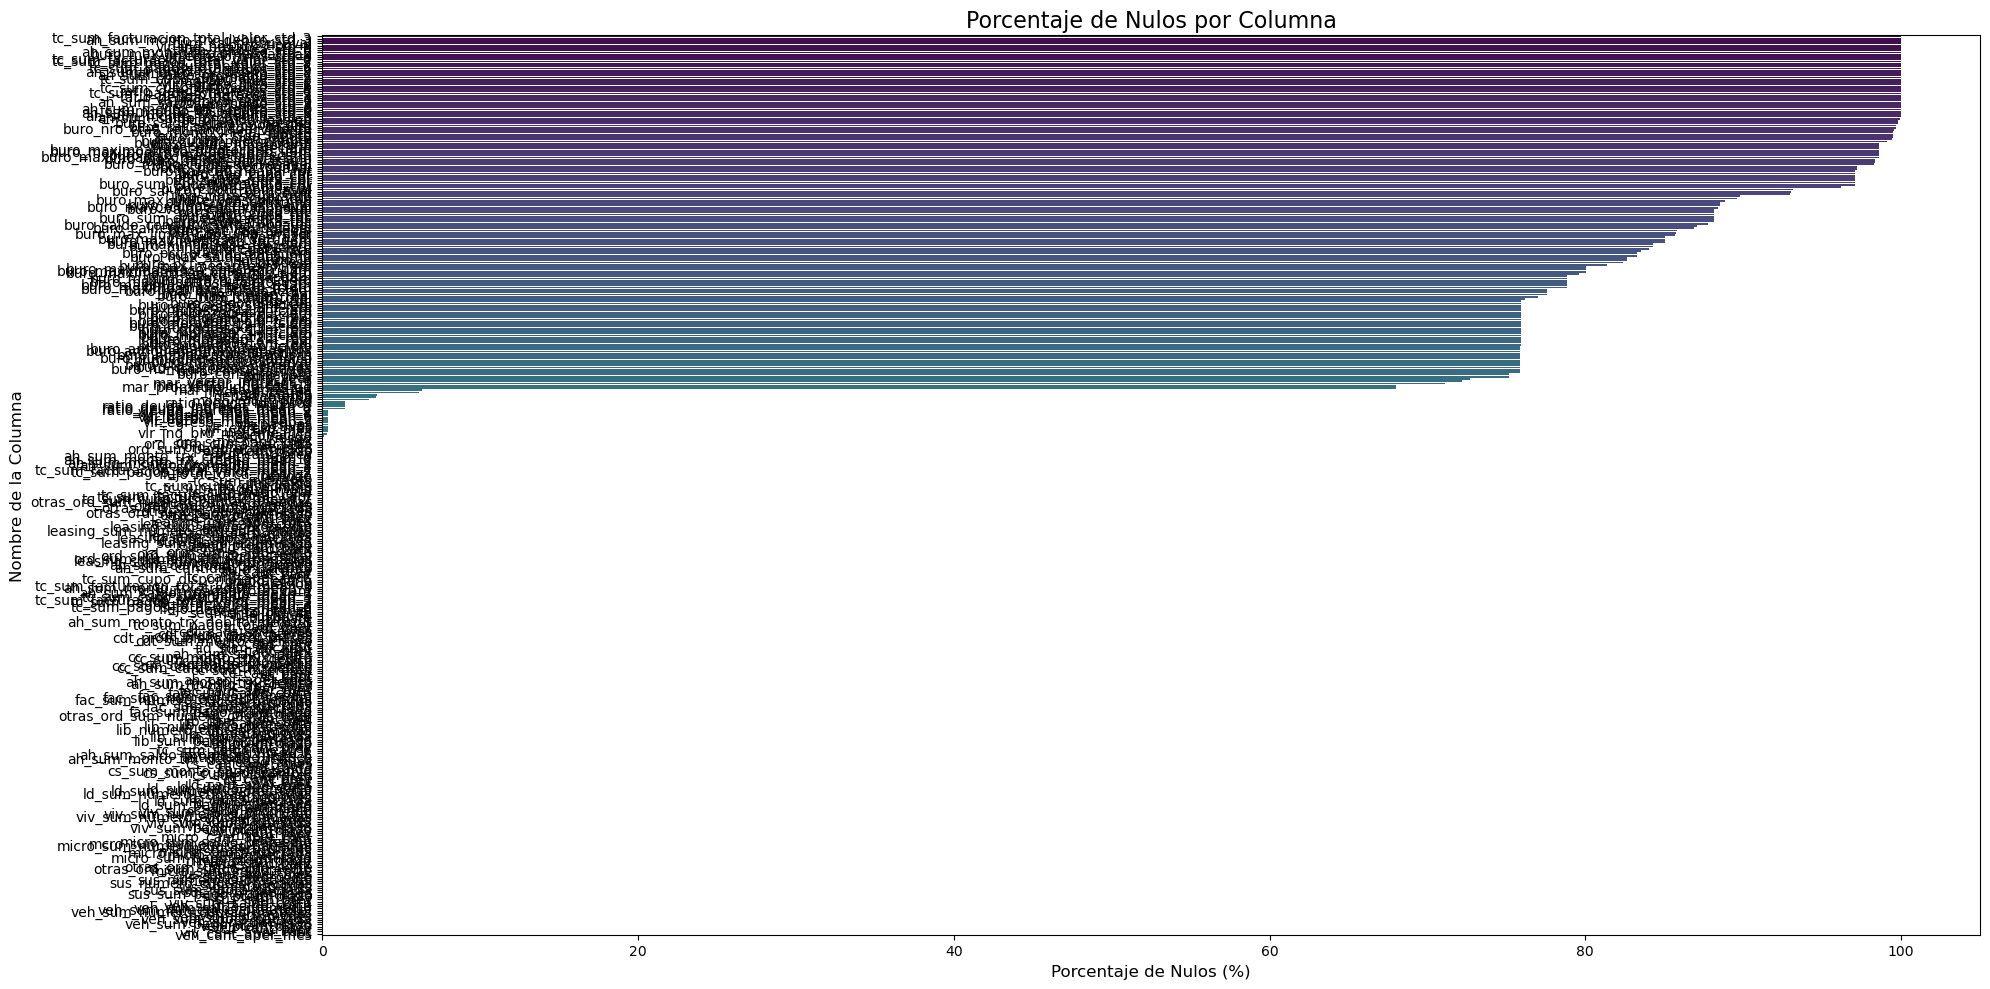

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_nulls_percentage(analysis_df):
    # Filtrar solo las columnas que contienen el porcentaje de nulos
    nulls_df = analysis_df[['Column Name', 'Nulls Percentage']]
    
    # Ordenar las columnas por el porcentaje de nulos
    nulls_df = nulls_df.sort_values(by='Nulls Percentage', ascending=False)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Nulls Percentage', y='Column Name', data=nulls_df, palette='viridis')
    plt.title('Porcentaje de Nulos por Columna', fontsize=16)
    plt.xlabel('Porcentaje de Nulos (%)', fontsize=12)
    plt.ylabel('Nombre de la Columna', fontsize=12)
    plt.tight_layout()
    plt.show()

# Después de realizar el análisis, puedes llamar a esta función
plot_nulls_percentage(analysis_df_v10)
